<a href="https://colab.research.google.com/github/praveenrachamreddy/tradingBotPython/blob/main/ml_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('output.csv')

In [3]:
# Assuming 'Close' is the price you want to predict
X = df[['open', 'high', 'low', 'volume', 'oi']]  # Features
y = df['close']  # Target


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [6]:
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 6.3694564171944545


In [9]:
new_df = pd.read_csv('output2.csv')

In [10]:
# Assuming 'output1.csv' has the same 'Open', 'High', 'Low', 'Volume', 'OI' columns
X_new = new_df[['open', 'high', 'low', 'volume', 'oi']]


In [11]:
new_prices = model.predict(X_new)

In [12]:
new_df['Predicted_Close'] = new_prices

In [13]:
new_df.to_csv('output_with_predictions.csv', index=False)

In [14]:
# Assuming 'Actual_Close' is the column with actual closing prices
mse_new = mean_squared_error(new_df['close'], new_prices)
print(f'New Mean Squared Error: {mse_new}')


New Mean Squared Error: 26.62132781550953


In [15]:
!pip install matplotlib


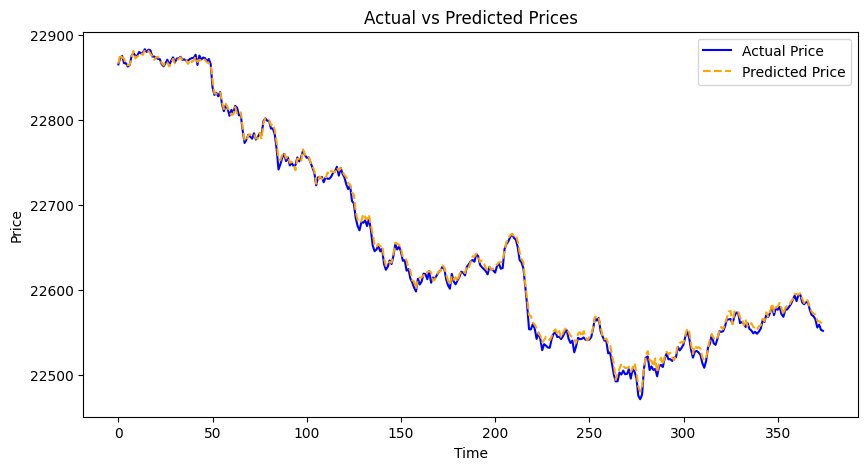

In [16]:
import matplotlib.pyplot as plt

# Assuming 'new_df' is your dataframe with actual and predicted prices
# And it has columns 'Actual_Close' for actual closing prices
# and 'Predicted_Close' for the predicted closing prices

plt.figure(figsize=(10, 5))
plt.plot(new_df['close'], label='Actual Price', color='blue')
plt.plot(new_df['Predicted_Close'], label='Predicted Price', color='orange', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


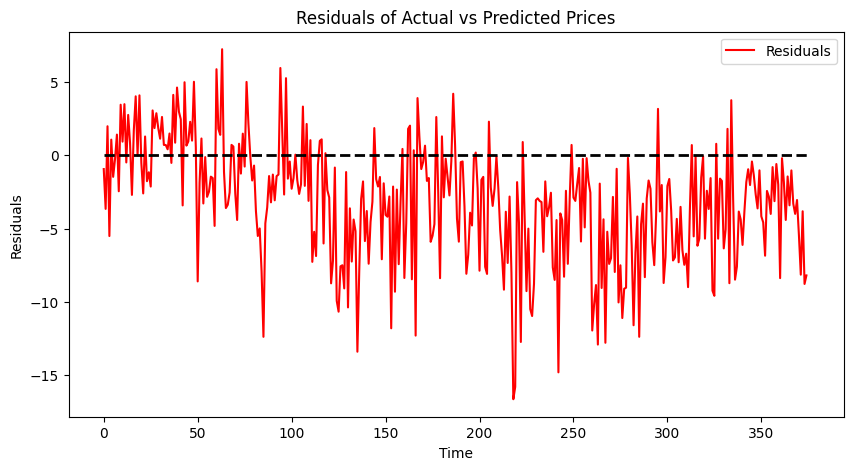

In [17]:
residuals = new_df['close'] - new_df['Predicted_Close']

plt.figure(figsize=(10, 5))
plt.plot(residuals, label='Residuals', color='red')
plt.hlines(y=0, xmin=0, xmax=len(residuals), colors='black', linestyles='--', lw=2)
plt.title('Residuals of Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that first scales the data then applies Ridge regression
pipeline = make_pipeline(StandardScaler(), Ridge())

# Define a range of alpha values for hyperparameter tuning
parameters = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to find the best alpha value
ridge_regressor = GridSearchCV(pipeline, parameters, cv=5)

# Fit the model to the training data
ridge_regressor.fit(X_train, y_train)

# Get the best model
best_model = ridge_regressor.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print(f'Best Model Mean Squared Error: {mse}')

# Predict the next price using the best model
next_price = best_model.predict(new_df)
print(f'Predicted Next Price: {next_price[0]}')


Best Model Mean Squared Error: 6.370564401495178


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Predicted_Close
- close
